In [5]:
%load_ext autoreload
%autoreload 2
import sys
extra_path = "/Users/iraklis/git/iraklis7_linrg"
if extra_path not in sys.path:
    sys.path.append(extra_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from pathlib import Path
import pandas as pd
import iraklis7_linrg.config as config
import iraklis7_linrg.plots as plots

### Load the data

In [7]:
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
plot_path: Path = config.FIGURES_DIR / config.FEATURES_PLOT

features = config.read_data(features_path)
if features is None:
    raise ValueError("read_data failed - data is None")
labels = config.read_data(labels_path)
if labels is None:
    raise ValueError("read_data failed - data is None")

features.sample(10)

,Κωδικός Συστήματος,Εμβαδόν,Όροφος,Σύνολο ορόφων,Ασανσέρ,Θέα,Έτος κατασκευής,Έτος ανακαίνισης,Όροφος Ρετιρέ,Ηλικία,Κατάσταση,Ασανσέρ από 3ο
103,0.602555,-0.491533,0.578335,-0.079207,0.325222,0.607493,-0.870940,0.669126,3.074824,-0.636219,1.247554,0.744348
67,0.056889,0.236899,-0.846847,NaN,-3.074824,-1.646110,-2.488223,NaN,-0.325222,-0.636219,-0.831703,-1.343457
81,0.372246,0.236899,-1.321908,0.484042,0.325222,0.607493,-0.362651,0.669126,-0.325222,-0.636219,1.247554,-1.343457
40,0.267879,-0.297285,-0.846847,NaN,0.325222,-1.646110,-0.177819,NaN,-0.325222,-0.636219,-0.831703,-1.343457
106,0.451774,-0.977155,-0.846847,0.484042,0.325222,0.607493,-0.362651,-2.481847,-0.325222,-0.636219,-0.831703,-1.343457
38,0.680029,0.528272,0.103274,NaN,0.325222,0.607493,-0.177819,0.579098,-0.325222,-0.636219,1.247554,0.744348
95,0.762531,-0.394409,-0.846847,-1.205704,-3.074824,0.607493,-0.455067,NaN,-0.325222,-0.636219,-0.831703,-1.343457
11,-0.687514,-0.782906,1.528456,1.047290,0.325222,0.607493,0.469095,NaN,3.074824,0.718692,-0.831703,0.744348
10,0.627215,-0.831469,2.003517,NaN,0.325222,-1.646110,-0.316443,NaN,-0.325222,-0.636219,-0.831703,0.744348
97,0.794387,0.528272,0.103274,NaN,0.325222,0.607493,-0.177819,NaN,-0.325222,-0.636219,-0.831703,0.744348


### Visualize features and labels

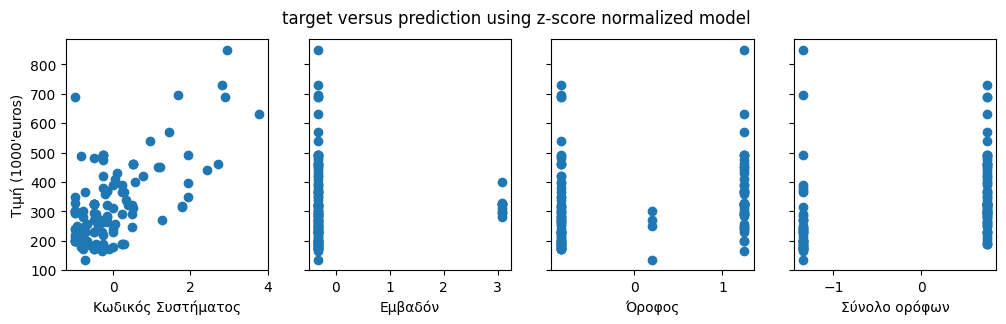

,Εμβαδόν,Όροφος Ρετιρέ,Κατάσταση,Ασανσέρ από 3ο
0,0.479710,-0.325222,1.247554,-1.343457
1,-0.782906,-0.325222,-0.831703,-1.343457
2,0.576834,3.074824,-0.831703,0.744348
3,-0.151598,-0.325222,1.247554,0.744348
4,-0.734344,-0.325222,-0.831703,0.744348


In [8]:
features_sel = features[['Εμβαδόν', 'Όροφος Ρετιρέ', 'Κατάσταση', 'Ασανσέρ από 3ο']]
plots.gen(list(features), features_sel.to_numpy(), labels, None, None, None, plot_path, True)

features_sel.head()